# UBC Scientific Software Seminar

##  August 17, 2016

Today's Agenda:

1. SciPy Example: Fitting Wind Speed Distributions to the Weibull Distribution
2. A tour of scikit-learn (by examples)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

### 1. SciPy Example: Fitting Wind Speed Distributions to the Weibull Distribution

It is well-known in the [wind energy industry](http://wind-data.ch/tools/weibull.php?lng=en) that wind speed distributions (measured in m/s) are modelled by the [Weibull distribution](https://en.wikipedia.org/wiki/Weibull_distribution):

![weibull](https://wikimedia.org/api/rest_v1/media/math/render/svg/847f7f8870ffa9eabda2b09dc503ff4cb7753695)

where, in the case of wind speed, the independent variable $x$ is wind speed measured in m/s, the coefficient $\lambda$ is approximately equal to the average wind speed and $k$ is usually in the range [1,2].

Let's plot the wind speed distribution at the Vancouver Airport using pandas and matplotlib, and fit the distribution to the Weibull distribution using SciPy.

#### Plot the wind speed distribution

In [2]:
wind = pd.read_csv("2016-08-10-notes/wind.csv")

In [3]:
wind.head()

,Year,Month,Day,Hour,Pressure,Wind Direction,Wind Speed,Temperature
0,2010,1,1,0,100.87,E,22.0,5.5
1,2010,1,1,1,100.81,E,19.0,5.4
2,2010,1,1,2,100.77,E,26.0,5.7
3,2010,1,1,3,100.69,ESE,26.0,5.5
4,2010,1,1,4,100.58,ESE,26.0,5.8


In [4]:
wind.tail()

,Year,Month,Day,Hour,Pressure,Wind Direction,Wind Speed,Temperature
54774,2016,4,1,7,102.15,ENE,4.0,8.7
54775,2016,4,1,8,102.15,ESE,17.0,10.1
54776,2016,4,1,9,102.15,ESE,11.0,11.7
54777,2016,4,1,10,102.15,SE,10.0,13.5
54778,2016,4,1,11,102.15,SSW,13.0,13.4


In [5]:
wind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54779 entries, 0 to 54778
Data columns (total 8 columns):
Year              54779 non-null int64
Month             54779 non-null int64
Day               54779 non-null int64
Hour              54779 non-null int64
Pressure          54776 non-null float64
Wind Direction    53180 non-null object
Wind Speed        54777 non-null float64
Temperature       54777 non-null float64
dtypes: float64(3), int64(4), object(1)
memory usage: 3.3+ MB


Since we're only interested in wind speed, we can select the "Wind Speed" column:

In [6]:
wind_speed = wind["Wind Speed"]
wind_speed.head()

0    22.0
1    19.0
2    26.0
3    26.0
4    26.0
Name: Wind Speed, dtype: float64

Notice that wind speed is measured in km/h in this dataset. Let's check to see if there are any missing values:

In [7]:
wind_speed[wind_speed.isnull()]

6166   NaN
6361   NaN
Name: Wind Speed, dtype: float64

There are only 2 missing values and we can fill them in with the values from the previous measurement using the [fillna](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html) DataFrame method:

In [8]:
wind_speed = wind_speed.fillna(method='ffill')

To plot the wind speed distribution, we can plot a [histogram](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist) of wind speeds with bins of size 4 km/h up to the maximum wind speed:

In [9]:
wind_speed.max()

78.0

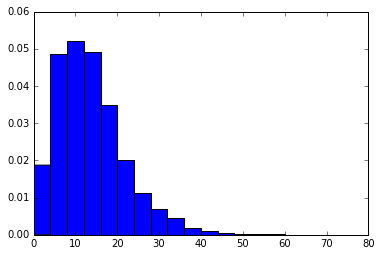

In [10]:
data, bins, _ = plt.hist(wind_speed,bins=np.arange(0,82,4),normed=True)

The output of the matplotlib.pyplot function [hist](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist) is a tuple with three entries: the frequency for each bin, the edges of each bin, and (silent) list of patches (which we don't need). We've unpacked these into variables `data` and `bins` (and forgotten the patches `_`). Notice that we used the keyword argument `normed=True` to get the frequency as a fraction instead of a hard count of the wind speed data.

In [11]:
data

array([  1.87298052e-02,   4.87093594e-02,   5.19724712e-02,
         4.90790266e-02,   3.48217383e-02,   2.00852516e-02,
         1.11447818e-02,   7.01911316e-03,   4.44969788e-03,
         1.75249639e-03,   9.03630953e-04,   5.79601672e-04,
         3.14901696e-04,   2.41881013e-04,   1.09531025e-04,
         4.56379269e-05,   2.73827562e-05,   9.12758539e-06,
         0.00000000e+00,   4.56379269e-06])

In [12]:
bins

array([ 0,  4,  8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48, 52, 56, 60, 64,
       68, 72, 76, 80])

#### Fit the wind speed distribution to the Weibull distribution

The data that we want to fit is given by the NumPy array `data` however we want to prepend a data point to the array to represent 0 frequency at wind speed 0.

In [13]:
Y = np.append(0,data)
print(Y)

[  0.00000000e+00   1.87298052e-02   4.87093594e-02   5.19724712e-02
   4.90790266e-02   3.48217383e-02   2.00852516e-02   1.11447818e-02
   7.01911316e-03   4.44969788e-03   1.75249639e-03   9.03630953e-04
   5.79601672e-04   3.14901696e-04   2.41881013e-04   1.09531025e-04
   4.56379269e-05   2.73827562e-05   9.12758539e-06   0.00000000e+00
   4.56379269e-06]


We want the corresponding wind speed values to be the midpoint of each bin and 0 as the first value:

In [14]:
X = np.append(0,bins[1:] - 2)
print(X)

[ 0  2  6 10 14 18 22 26 30 34 38 42 46 50 54 58 62 66 70 74 78]


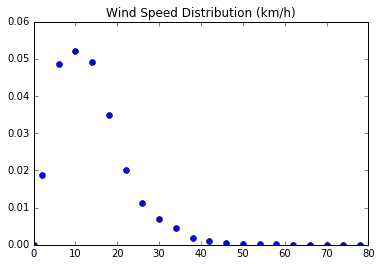

In [15]:
plt.plot(X,Y,'bo')
plt.title('Wind Speed Distribution (km/h)')

SciPy has a subpackage called [scipy.optimize](http://docs.scipy.org/doc/scipy/reference/optimize.html) which contains many methods for optimization and root finding. We will use the [curve_fit](http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html#scipy.optimize.curve_fit) method to fit the wind speed distribution to the Weibull distribution and so let's import the method:

In [16]:
from scipy.optimize import curve_fit

We can display the documentation for `curve_fit` in the notebook using `?`:

In [17]:
curve_fit?

We have the arrays `X` and `Y` for the fit and so we just need to define a function for the Weibull distribution. Notice that the first variable is the independent variable $x$ and the following parameters are the coefficients in the Weibull distribution:

In [18]:
def f(x,k,ell):
    '''Weibull distribution with parameters k and ell'''
    return np.where(x < 0, 0., (k/ell)*(x/ell)**(k-1) * np.exp(-(x/ell)**k))

We've used the NumPy function [numpy.where](http://docs.scipy.org/doc/numpy/reference/generated/numpy.where.html) to define a step function. Let's plot our function to make sure it corresponds with the [definition](https://en.wikipedia.org/wiki/Weibull_distribution):

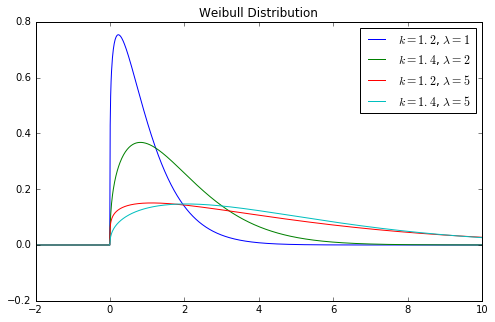

In [19]:
plt.figure(figsize=(8,5))
x = np.linspace(-2,10,1000)
labels = []
for k,ell in [(1.2,1),(1.4,2),(1.2,5),(1.4,5)]:
    y = f(x,k,ell)
    plt.plot(x,y)
    labels.append('$k = {0}$, $\lambda = {1}$'.format(k,ell))

plt.title('Weibull Distribution')
plt.ylim([-0.2,0.8])
plt.legend(labels)

Finally, we are ready to fit the data. According to [industry standards](http://wind-data.ch/tools/weibull.php?lng=en) we know the parameter $k$ should be between 1 and 2 and $\lambda$ should be around the mean wind speed (~15 km/h in our case) therefore we can specify an intial guess for the curve fitting algorithm:

In [20]:
params, _ = curve_fit(f,X,Y,p0=(1.5,15))

In [21]:
params

array([  1.85706203,  15.02485969])

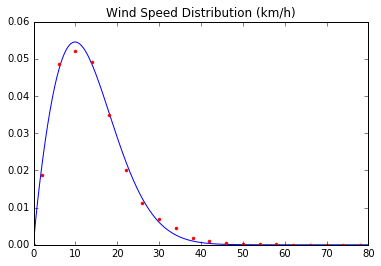

In [22]:
x = np.linspace(0,80,1000)
y = f(x,params[0],params[1])
plt.plot(x,y)
plt.plot(X,Y,'r.')
plt.title('Wind Speed Distribution (km/h)')

**EXERCISE**

Plot the squared error

$$
\sum_{i=0}^{N} \left( y_i - f(x_i,k,\lambda) \right)^2
$$

for a grid of values for $k$ and $\lambda$.

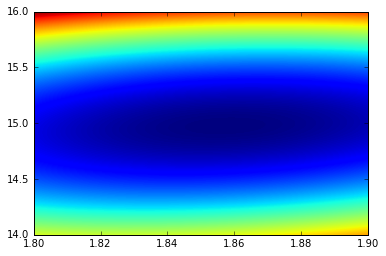

In [23]:
k1, k2 = (1.8,1.9)
A1, A2 = (14,16)
kvalues = np.linspace(k1,k2,1000)
Avalues = np.linspace(A1,A2,1000)
kvalues, Avalues = np.meshgrid(kvalues,Avalues)
ERR = np.sum([(f(X[i],kvalues,Avalues) - Y[i])**2 for i in range(0,len(X))],axis=0)
ERR = ERR / ERR.max()
plt.imshow(ERR,extent=[k1,k2,A1,A2],aspect='auto')

### 2. A tour of scikit-learn

[Machine learning](https://en.wikipedia.org/wiki/Machine_learning) is a *very large* field study and so we won't (and can't) go through everything. Instead, we'll start off with examples notebooks written in-part by [Gael Varoquaux](https://github.com/GaelVaroquaux) for various introductory courses taught at SciPy conferences in the past few years.

Before getting into these example notebooks
, take a look at the [scikit-learn](http://scikit-learn.org/) documentation and especially the [tutorial](http://scikit-learn.org/stable/tutorial/basic/tutorial.html).

To get started, clone the [GitHub repo](https://github.com/GaelVaroquaux/sklearn_ensae_course):

In [24]:
! git clone https://github.com/GaelVaroquaux/sklearn_ensae_course.git

Cloning into 'sklearn_ensae_course'...
remote: Counting objects: 903, done.
remote: Compressing objects: 100% (311/311), done.
remote: Total 903 (delta 588), reused 903 (delta 588), pack-reused 0
Receiving objects: 100% (903/903), 16.50 MiB | 4.56 MiB/s, done.
Resolving deltas: 100% (588/588), done.
Checking connectivity... done.


1. In the Jupyter main page, navigate to the directory `sklearn_ensae_course` that was cloned above.
2. Go to the directory `notebooks` and start with `00_introduction_machine_learning_and_data.ipynb`
    * You may get an error about the version of the Jupyter notebook -- click OK
    * Follow the notebook and execute each cell as you go
    * In the second code cell, you'll get an error: `No module named 'urllib2'` and the error message points to an import in the file `sklearn_ensae_course/notebooks/figures/sdss_filters.py`
        * Open the file `sklearn_ensae_course/notebooks/figures/sdss_filters.py` and replace `urllib2` with `requests` on lines 9, 30, and 47. (`requests` is the new HTTP package for Python 3.)
    * The second cell should work but now we get several warnings: `DeprecationWarning: Passing 1d arrays as data ...`
        * Open the file `sklearn_ensae_course/notebooks/figures/sgd_separator.py` and edit line 25:
```python
p = clf.decision_function(np.array([x1, x2]).reshape(1,2))
```
        * We need to restart the kernel since we changed something that was already imported into the notebook
        * After restarting the kernel (and re-executing the first cell), the notebook should run smoothly ...
    * Be sure to change the values of `x_index` and `y_index` in the last cell to plot the different features of the dataset
3. Go to the directory `notebooks` and open `03_supervised_classification.ipynb`
    * Follow the notebook and execute each cell as you